<a href="https://colab.research.google.com/github/afnanhabib787/Artificial-Intelligence/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The generator
##GAN generator network

In [1]:
import keras
from keras import layers
import numpy as np
latent_dim = 32
height = 32
width = 32
channels = 3

generator_input = keras.Input(shape=(latent_dim,))

x = layers.Dense(128 * 16 * 16)(generator_input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((16, 16, 128))(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)
generator = keras.models.Model(generator_input, x)
generator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense (Dense)               (None, 32768)             1081344   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 16, 16, 128)       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 256)       819456    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 256)      104883

The GAN discriminator network

In [2]:
discriminator_input = layers.Input(shape=(height, width, channels))
x = layers.Conv2D(128, 3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)

x = layers.LeakyReLU()(x)
x = layers.Conv2D(128, 4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

x = layers.Dropout(0.4)(x)
x = layers.Dense(1, activation='sigmoid')(x)
discriminator = keras.models.Model(discriminator_input, x)
discriminator.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 30, 30, 128)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       262272    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 6, 6, 128)         262272    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 6, 6, 128)         0   

In [5]:
import tensorflow
discriminator_optimizer = tensorflow.keras.optimizers.RMSprop(
    lr=0.0008,
    clipvalue=1.0,
    decay=1e-8)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [6]:
discriminator.compile(optimizer=discriminator_optimizer,
                      loss='binary_crossentropy')

#Adversarial network

In [8]:
discriminator.trainable = False
gan_input = keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(
    
))
gan = keras.models.Model(gan_input, gan_output)

gan_optimizer = tensorflow.keras.optimizers.RMSprop(lr=0.0004, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


#Implementing GAN training

In [9]:
import os
from keras.preprocessing import image
(x_train, y_train), (_, _) = keras.datasets.cifar10.load_data()

x_train = x_train[y_train.flatten() == 6]
x_train = x_train.reshape((x_train.shape[0],) +
                          (height, width, channels)).astype('float32') / 255.

170508288/170498071 [==============================] - 2s 0us/step


In [12]:
iterations = 10000
batch_size = 20
save_dir = '/content/'

discriminator loss: 3.121469020843506
adversarial loss: 1.7898473743116483e-06


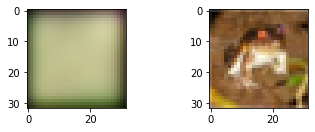

discriminator loss: 0.7552330493927002
adversarial loss: 0.7064193487167358


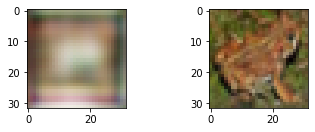

discriminator loss: 0.6967391967773438
adversarial loss: 1.0841907262802124


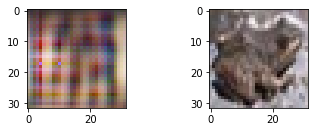

discriminator loss: 0.6986535787582397
adversarial loss: 0.7821170687675476


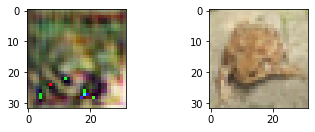

discriminator loss: 0.7146164178848267
adversarial loss: 0.7077096700668335


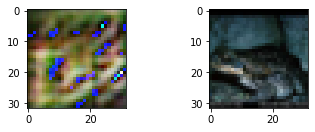

discriminator loss: 0.6939183473587036
adversarial loss: 0.7721946835517883


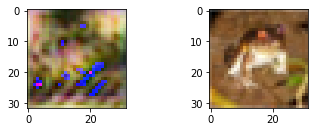

discriminator loss: 0.7085617184638977
adversarial loss: 0.7636412978172302


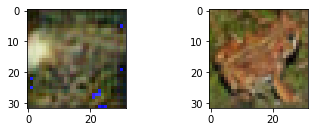

discriminator loss: 0.6877995729446411
adversarial loss: 0.7390924096107483


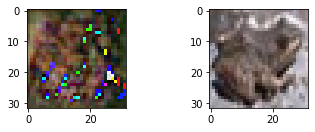

discriminator loss: 0.6906631588935852
adversarial loss: 0.7026783227920532


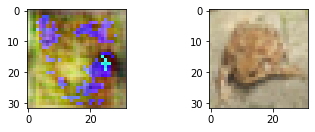

discriminator loss: 0.6955098509788513
adversarial loss: 0.7637990117073059


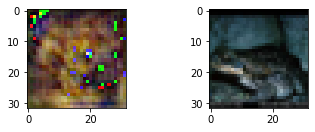

discriminator loss: 0.6914924383163452
adversarial loss: 0.7496753931045532


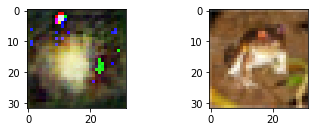

discriminator loss: 0.6918871998786926
adversarial loss: 0.7567030191421509


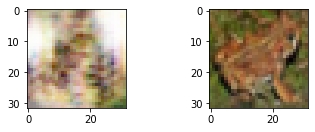

discriminator loss: 0.6975006461143494
adversarial loss: 0.7568624019622803


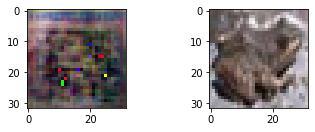

discriminator loss: 0.6917699575424194
adversarial loss: 0.7254046201705933


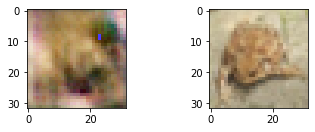

discriminator loss: 0.7056962847709656
adversarial loss: 0.7459238767623901


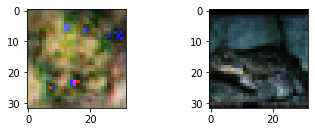

discriminator loss: 0.693341851234436
adversarial loss: 0.7565568685531616


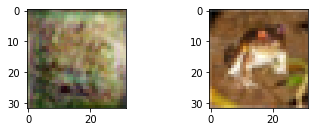

discriminator loss: 0.6989836096763611
adversarial loss: 0.7470879554748535


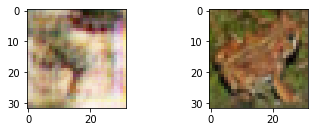

discriminator loss: 0.6908688545227051
adversarial loss: 0.7757467031478882


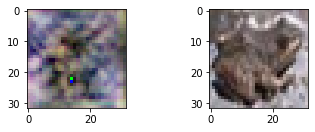

discriminator loss: 0.6901403069496155
adversarial loss: 0.7535709142684937


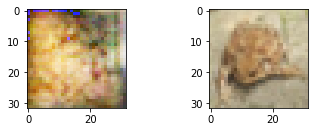

discriminator loss: 0.6995933651924133
adversarial loss: 0.9024946093559265


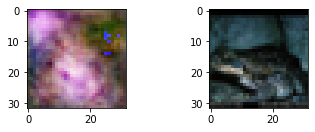

discriminator loss: 0.7002314329147339
adversarial loss: 0.753510594367981


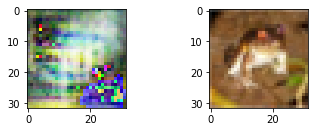

discriminator loss: 0.6930365562438965
adversarial loss: 0.725711464881897


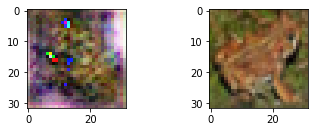

discriminator loss: 0.7017979621887207
adversarial loss: 0.7592613101005554


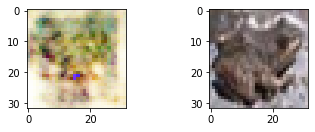

discriminator loss: 0.6885169744491577
adversarial loss: 0.7051547765731812


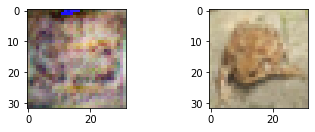

discriminator loss: 0.6944627165794373
adversarial loss: 0.7249045968055725


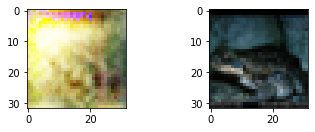

discriminator loss: 0.7020866274833679
adversarial loss: 0.7363919019699097


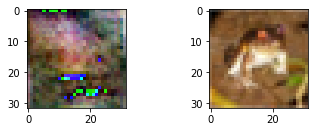

discriminator loss: 0.705524742603302
adversarial loss: 0.9287607073783875


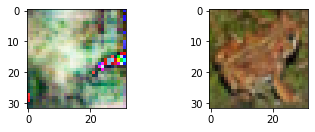

discriminator loss: 0.6818811893463135
adversarial loss: 0.7651465535163879


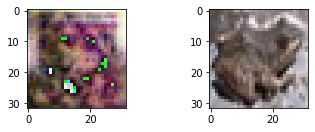

discriminator loss: 0.6868758201599121
adversarial loss: 0.7298232913017273


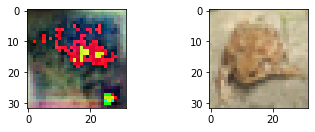

discriminator loss: 0.6897187232971191
adversarial loss: 0.733501136302948


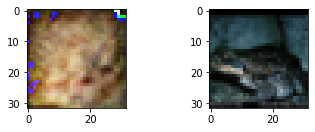

discriminator loss: 0.6919647455215454
adversarial loss: 0.7153213024139404


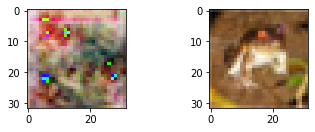

discriminator loss: 0.6947814226150513
adversarial loss: 0.7011101841926575


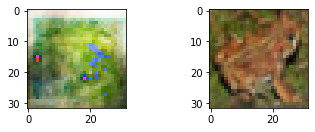

discriminator loss: 0.6989761590957642
adversarial loss: 0.7426434755325317


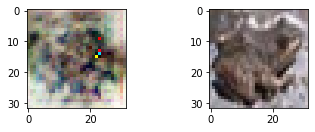

discriminator loss: 0.6924440264701843
adversarial loss: 0.7242481112480164


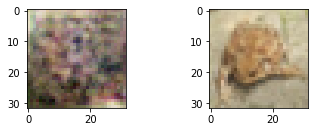

discriminator loss: 0.6881064176559448
adversarial loss: 0.7401586174964905


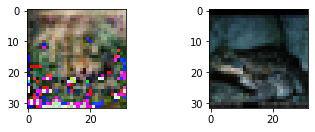

discriminator loss: 0.6861600875854492
adversarial loss: 0.7366669774055481


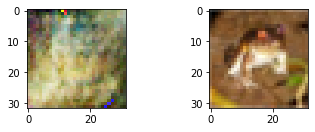

discriminator loss: 0.6966915130615234
adversarial loss: 0.7505882382392883


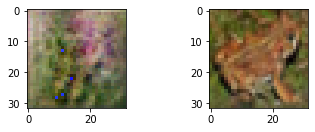

discriminator loss: 0.6984050869941711
adversarial loss: 0.7671864032745361


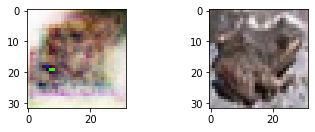

discriminator loss: 0.6851377487182617
adversarial loss: 0.7470580339431763


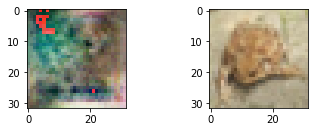

discriminator loss: 0.6920794248580933
adversarial loss: 0.7466670274734497


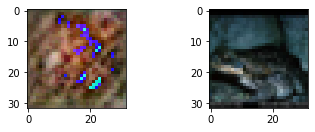

discriminator loss: 0.7284366488456726
adversarial loss: 0.7842801213264465


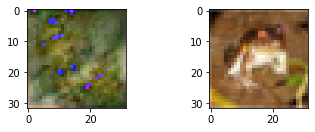

discriminator loss: 0.7095693349838257
adversarial loss: 0.7433806657791138


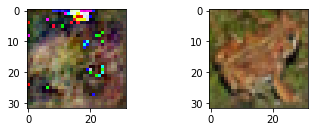

discriminator loss: 0.6687988042831421
adversarial loss: 0.7780563235282898


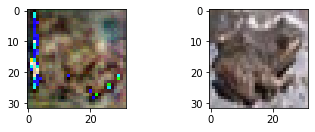

discriminator loss: 0.7065831422805786
adversarial loss: 0.7302049398422241


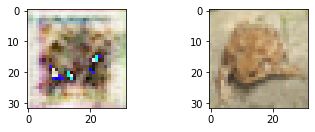

discriminator loss: 0.7023965120315552
adversarial loss: 0.7637894749641418


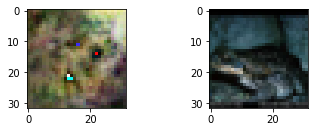

discriminator loss: 0.713405191898346
adversarial loss: 1.1664929389953613


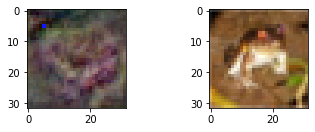

discriminator loss: 0.6893948316574097
adversarial loss: 0.7586677670478821


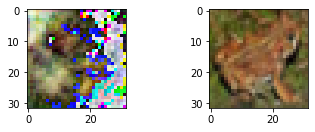

discriminator loss: 0.6978608965873718
adversarial loss: 0.7946910858154297


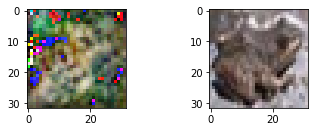

discriminator loss: 0.691616952419281
adversarial loss: 0.7864136695861816


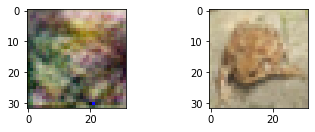

discriminator loss: 0.6927241683006287
adversarial loss: 0.7616780996322632


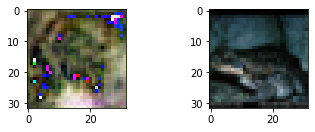

discriminator loss: 0.7636019587516785
adversarial loss: 0.7848042249679565


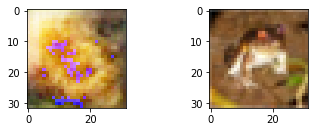

discriminator loss: 0.6958788633346558
adversarial loss: 0.7611157298088074


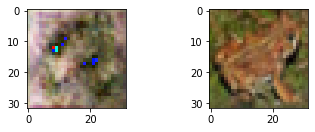

discriminator loss: 0.6907210946083069
adversarial loss: 0.7543368935585022


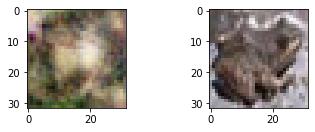

discriminator loss: 0.6901119351387024
adversarial loss: 1.6213613748550415


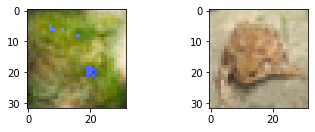

discriminator loss: 0.6970409154891968
adversarial loss: 0.7414731979370117


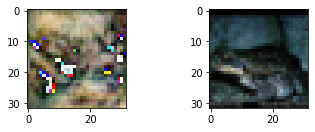

discriminator loss: 0.6916391253471375
adversarial loss: 0.7105434536933899


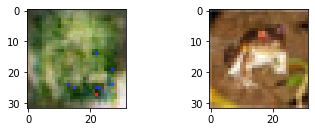

discriminator loss: 0.6863745450973511
adversarial loss: 0.712480902671814


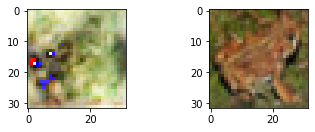

discriminator loss: 0.6980091333389282
adversarial loss: 0.7684264779090881


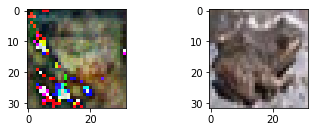

discriminator loss: 0.7090204954147339
adversarial loss: 0.8172680139541626


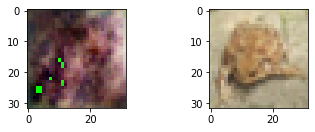

discriminator loss: 0.6888526082038879
adversarial loss: 0.7281479835510254


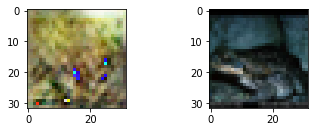

discriminator loss: 0.6819424629211426
adversarial loss: 0.7573341131210327


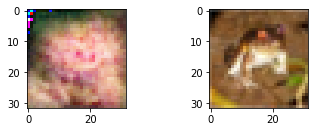

discriminator loss: 0.6822762489318848
adversarial loss: 0.7980570793151855


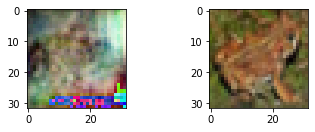

discriminator loss: 0.6867889761924744
adversarial loss: 0.749095618724823


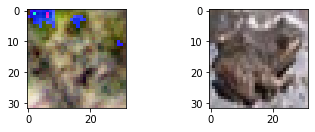

discriminator loss: 0.6892985105514526
adversarial loss: 0.7731488943099976


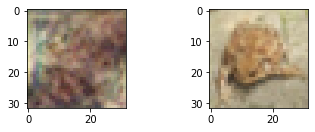

discriminator loss: 0.7049224972724915
adversarial loss: 0.7460096478462219


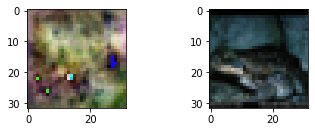

discriminator loss: 0.699907660484314
adversarial loss: 0.7261752486228943


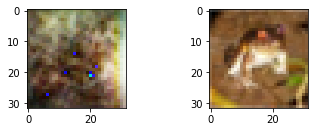

discriminator loss: 0.7001940608024597
adversarial loss: 0.7443206906318665


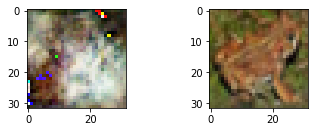

discriminator loss: 0.6903363466262817
adversarial loss: 0.7438909411430359


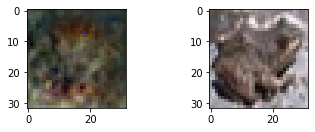

discriminator loss: 0.696963906288147
adversarial loss: 0.6914200782775879


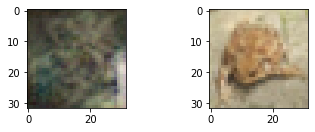

discriminator loss: 0.7013722658157349
adversarial loss: 0.7468034625053406


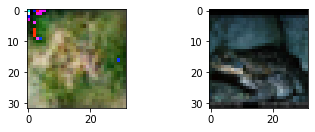

discriminator loss: 0.698259174823761
adversarial loss: 0.7329021692276001


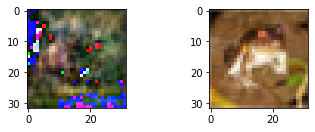

discriminator loss: 0.6877840161323547
adversarial loss: 0.6986685991287231


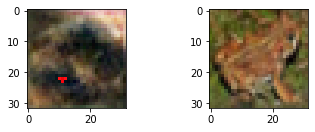

discriminator loss: 0.6913261413574219
adversarial loss: 0.8468831181526184


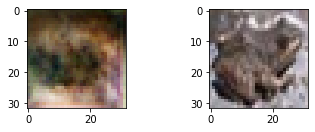

discriminator loss: 0.6984911561012268
adversarial loss: 0.7987857460975647


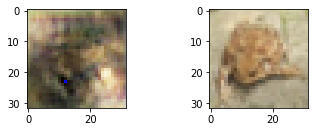

discriminator loss: 0.6960582137107849
adversarial loss: 0.7679814100265503


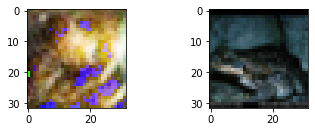

discriminator loss: 0.7015294432640076
adversarial loss: 0.809607982635498


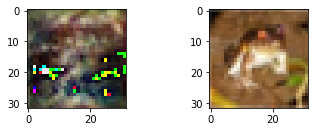

discriminator loss: 0.7239559292793274
adversarial loss: 0.7301996946334839


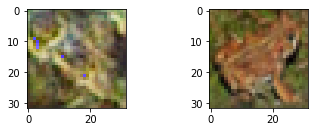

discriminator loss: 0.6875364184379578
adversarial loss: 0.8061431050300598


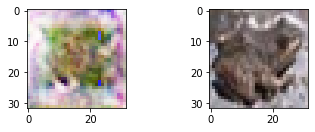

discriminator loss: 0.6662955284118652
adversarial loss: 0.7660857439041138


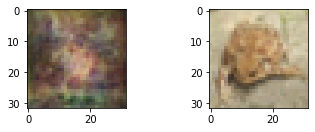

discriminator loss: 0.7061555981636047
adversarial loss: 0.7785382270812988


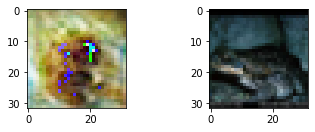

discriminator loss: 0.6724246740341187
adversarial loss: 1.0133612155914307


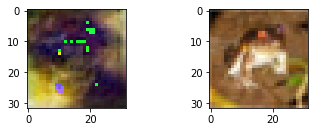

discriminator loss: 0.6893665194511414
adversarial loss: 0.7845533490180969


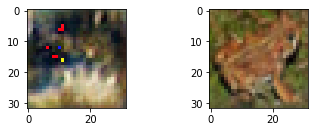

discriminator loss: 0.7462553977966309
adversarial loss: 0.8565601110458374


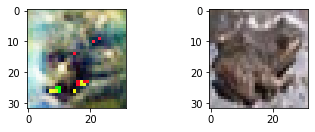

discriminator loss: 0.6887897253036499
adversarial loss: 0.7272500991821289


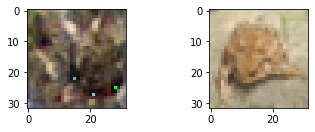

discriminator loss: 0.6756435036659241
adversarial loss: 0.6924058198928833


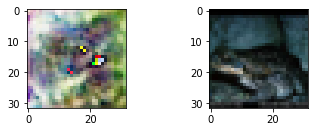

discriminator loss: 0.7288309931755066
adversarial loss: 1.0173757076263428


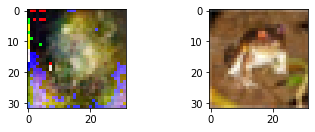

discriminator loss: 0.6642227172851562
adversarial loss: 0.7282301783561707


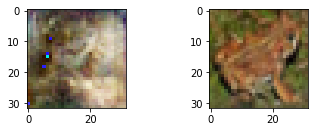

discriminator loss: 0.6835514307022095
adversarial loss: 0.8145571947097778


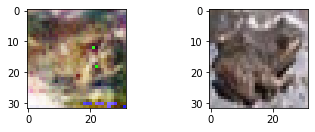

discriminator loss: 0.7565490007400513
adversarial loss: 0.9325229525566101


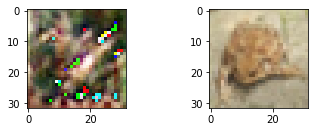

discriminator loss: 0.7113349437713623
adversarial loss: 0.8824013471603394


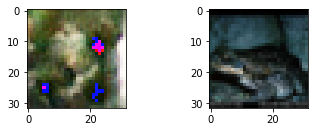

discriminator loss: 0.6650594472885132
adversarial loss: 0.7862042188644409


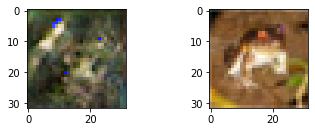

discriminator loss: 0.6941249370574951
adversarial loss: 0.781571626663208


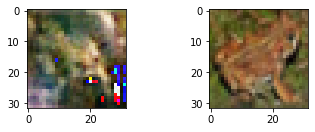

discriminator loss: 0.8020703196525574
adversarial loss: 0.9549880027770996


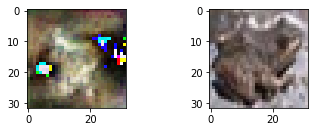

discriminator loss: 0.6913225054740906
adversarial loss: 0.7269638776779175


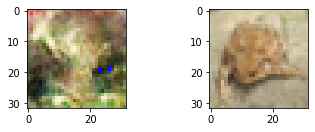

discriminator loss: 0.6684591174125671
adversarial loss: 1.4283208847045898


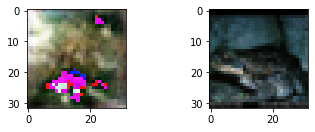

discriminator loss: 0.6683815717697144
adversarial loss: 0.8935819864273071


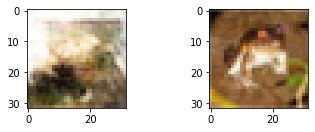

discriminator loss: 0.7157813310623169
adversarial loss: 0.8147487640380859


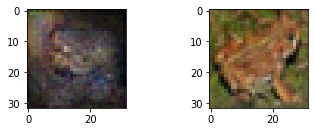

discriminator loss: 0.7023738026618958
adversarial loss: 0.6385006904602051


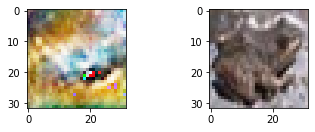

discriminator loss: 0.6653242111206055
adversarial loss: 0.7846130132675171


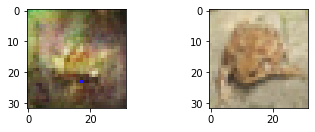

In [ ]:
import matplotlib.pyplot as plt
start = 0
for step in range(iterations):
  random_latent_vectors = np.random.normal(size=(batch_size,
                                                 latent_dim))
  generated_images = generator.predict(random_latent_vectors)
  stop = start + batch_size
  real_images = x_train[start: stop]
  combined_images = np.concatenate([generated_images, real_images])

  labels = np.concatenate([np.ones((batch_size, 1)),
  np.zeros((batch_size, 1))])
  labels += 0.05 * np.random.random(labels.shape)

  d_loss = discriminator.train_on_batch(combined_images, labels)
  random_latent_vectors = np.random.normal(size=(batch_size,
                                                 latent_dim))
  misleading_targets = np.zeros((batch_size, 1))
  a_loss = gan.train_on_batch(random_latent_vectors,
                              misleading_targets)
  start += batch_size
  if start > len(x_train) - batch_size:
    start = 0

  if step % 100 == 0:
    gan.save_weights('gan.h5')
    print('discriminator loss:', d_loss)
    print('adversarial loss:', a_loss)   

    img1 = image.array_to_img(generated_images[0] * 255., scale=False)
    img1.save(os.path.join(save_dir,
                          'generated_frog' + str(step) + '.png')) 
    img2 = image.array_to_img(real_images[0] * 255., scale=False)
    img2.save(os.path.join(save_dir,
                          'real_frog' + str(step) + '.png'))
    
    fig = plt.figure()
    ax1 = fig.add_subplot(2,2,1)
    ax1.imshow(img1)
    ax2 = fig.add_subplot(2,2,2)
    ax2.imshow(img2)
    plt.show()